# 기초 자료구조

## 스택
* 마지막에 들어 온 데이터가 먼저 출력된다



In [ ]:
# 단순 리스트로 구현 가능
stack = []

stack.append("낙성대")
stack.append("사당")
stack.append("방배")
stack.append("서초")
stack.pop() # 제일 최근에 들어온 "서초"
stack.append("교대")
stack.append("강남")
stack.pop() # 제일 최근에 들어온 "강남"

print(stack[::-1]) # 최상단 원소부터 출력
print(stack) # 최하단 원소부터 출력

['교대', '방배', '사당', '낙성대']
['낙성대', '사당', '방배', '교대']


## 큐

* 먼저 들어 온 데이터가 먼저 출력된다

In [ ]:
# collections 모듈의 deque 자료구조로 구현 가능
# 단순 리스트 사용 시 시간 복잡도상 비효율적

from collections import deque

queue = deque("낙성대")
queue.append("서울대입구")
queue.append("봉천")
queue.append("신림")
queue.popleft() # 제일 먼저 들어온 "낙성대"
queue.append("신대방")
queue.append("구로디지털단지")
queue.popleft() # 제일 먼저 들어온 "서울대입구"

print(queue) # 먼저 들어온 순서대로 출력
queue.reverse() # 역순으로 바꾸기
print(queue) # 나중에 들어온 순서대로 출력

# 재귀 함수
* 자기 자신을 다시 호출하는 함수
* 재귀 함수의 종료 조건을 명시해야 무한 루프에 빠지지 않음

In [ ]:
#  스택과 마찬가지로, 가장 마지막으로 호출된 재귀함수가 먼저 종료

def recursive_function(i):
    # 100번째 호출 시 종료
    if i == 10:
        return
    print(f"{i}번째 재귀함수에서 {i + 1}번째 재귀함수를 호출합니다.")
    recursive_function(i + 1)
    print(f"{i}번째 재귀함수를 종료합니다.")

recursive_function(1)

1번째 재귀함수에서 2번째 재귀함수를 호출합니다.
2번째 재귀함수에서 3번째 재귀함수를 호출합니다.
3번째 재귀함수에서 4번째 재귀함수를 호출합니다.
4번째 재귀함수에서 5번째 재귀함수를 호출합니다.
5번째 재귀함수에서 6번째 재귀함수를 호출합니다.
6번째 재귀함수에서 7번째 재귀함수를 호출합니다.
7번째 재귀함수에서 8번째 재귀함수를 호출합니다.
8번째 재귀함수에서 9번째 재귀함수를 호출합니다.
9번째 재귀함수에서 10번째 재귀함수를 호출합니다.
9번째 재귀함수를 종료합니다.
8번째 재귀함수를 종료합니다.
7번째 재귀함수를 종료합니다.
6번째 재귀함수를 종료합니다.
5번째 재귀함수를 종료합니다.
4번째 재귀함수를 종료합니다.
3번째 재귀함수를 종료합니다.
2번째 재귀함수를 종료합니다.
1번째 재귀함수를 종료합니다.


In [ ]:
# 팩토리얼 구현 예제

# 반복문
def factorial_iterative(n):
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# 재귀함수
def factorial_recursive(n):
    # 종료조건, 1! = 1
    if n <= 1:
        return 1

    # n! = n * (n - 1)! 이므로
    return n * factorial_recursive(n - 1)

print(factorial_iterative(7))
print(factorial_recursive(7))

5040
5040


In [ ]:
# 유클리드 호제법: 최대공약수 계산
# A와 B (A > B)의 최대공약수는
# B와 R(A를 B로 나눈 나머지)의 최대공약수

def gcd(a, b):
    a, b = max(a, b), min(a, b)
    r = a % b

    # 종료 조건
    if r == 0:
        return b
    else:
        return gcd(b, a % b)

print(gcd(192, 162))

6


* 모든 재귀함수는 반복문을 이용해서 동일한 기능을 구현할 수 있음
* 컴퓨터가 함수를 연속적으로 호출하면 메모리 내부 스택 프레임에 쌓임
    * 즉, 스택 라이브러리 대신 재귀 함수 이용 가능

# DFS (깊이 우선 탐색)

* 그래프에서 깊은 부분을 우선적으로 탐색
* 스택 자료구조 (or 재귀 함수) 이용

1. 탐색 시작 노드를 스택에 삽입하고 방문 처리
2. 최상단 노드가 없을 때까지 반복
    * 스택의 최상단 노드 중 방문하지 않은 인접 노드를 스택에 넣고 방문 처리
    * 인접 노드가 여러 개인 경우, 보통 번호가 낮은 인접 노드부터 방문
    * 방문하지 않은 인접 노드가 없으면, 스택에서 최상단 노드를 꺼내기

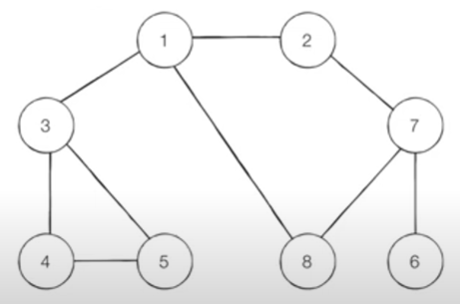

0. 스택: `[1]`
1. 최상단 노드: 1
    * 방문하지 않은 인접 노드: **2**, 3, 8
    * 스택: `[1, 2]`
2. 최상단 노드: 2
    * 방문하지 않은 인접 노드: **7**
    * 스택: `[1, 2, 7]`
3. 최상단 노드: 7
    * 방문하지 않은 인접 노드: **6**, 8
    * 스택: `[1, 2, 7, 6]`
4. 최상단 노드: 6
    * 방문하지 않은 인접 노드 없음
    * 스택: `[1, 2, 7]`
5. 최상단 노드: 7
    * 방문하지 않은 인접 노드: **8**
    * 스택: `[1, 2, 7, 8]`
    
위와 같이 방문 시, 방문 순서는 1 -> 2 -> 7 -> 6 -> 8 -> 3 -> 4 -> 5



In [1]:
# 각 노드의 연결 정보: 2차원 리스트로 표현
# 1-8번 노드, 인덱스 0은 사용 안함
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 방문 정보
# 1-8번 노드, 인덱스 0은 사용 안 함
visited = [False] * 9

# DFS 함수
def dfs(graph, node, visited):
    # 현재 노드 방문 처리
    visited[node] = True
    print(node, end=" ")

    for i in graph[node]:
        if not visited[i]:
            # 방문하지 않은 인접 노드 함수 호출 (= 스택에 삽입)
            dfs(graph, i, visited)


# 함수 호출 (= 스택에 삽입)
dfs(graph, 1, visited)

1 2 7 6 8 3 4 5 

# BFS (너비 우선 탐색)
* 그래프에서 가까운 노드부터 우선적으로 탐색
* 큐 자료구조 이용
1. 탐색 시작 노드를 큐에 삽입하고 방문 처리
2. 큐에서 노드를 꺼낸 뒤 해당 노드의 인접 노드 중에서 방문하지 않은 노드를 모두 큐에 삽입하고 방문 처리
    * 방문하지 않은 인접 노드가 여러 개인 경우, 보통 번호가 낮은 인접 노드를 더 먼저 삽입
3. 더 이상 2단계를 수행할 수 없을 때까지 반복

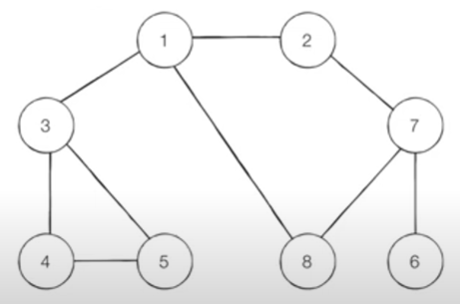

0. 큐: `[1]`
1. 첫 노드: 1
    * 방문하지 않은 인접 노드: 2, 3, 8
    * 큐: `[2, 3, 8]`
2. 첫 노드: 2
    * 방문하지 않은 인접 노드: 7
    * 큐: `[3, 8, 7]`
3. 첫 노드: 3
    * 방문하지 않은 인접 노드: 4, 5
    * 큐: `[8, 7, 4, 5]`
4. 첫 노드: 8
    * 방문하지 않은 인접 노드: 없음
    * 큐: `[7, 4, 5]`

이와 같이 방문 시 방문 순서는
* 1 (거리 0)
* 2 -> 3 -> 8 (거리 1)
* 7 -> 4 -> 5 (거리 2)
* 6 (거리 3)

즉, BFS는 최단 거리 문제를 해결할 때도 풀 수 있음

In [ ]:
from collections import deque

# 각 노드의 연결 정보: 2차원 리스트로 표현
# 1-8번 노드, 인덱스 0은 사용 안함
graph = [
    [],
    [2, 3, 8],
    [1, 7],
    [1, 4, 5],
    [3, 5],
    [3, 4],
    [7],
    [2, 6, 8],
    [1, 7]
]

# 방문 정보 겸 거리 계산 용도 (-1: 미방문)
# 1-8번 노드, 인덱스 0은 사용 안 함
visited = [-1] * 9

# DFS 함수
def bfs(graph, start, visited):
    # 탐색시작 노드를 큐에 삽입 및 방문 처리
    queue = deque([start])
    visited[start] = 0

    # 큐가 빌 때까지 반복
    while queue:
        node = queue.popleft() # 큐에서 노드를 꺼낸 뒤
        print(node, end=" ")

        # 방문하지 않은 원소들을 큐에 삽입 및 방문 처리
        for i in graph[node]:
            if visited[i] == -1:
                queue.append(i)
                visited[i] = visited[node] + 1

# 함수 호출
bfs(graph, 1, visited)
print()

for i in range(1, 9):
    print(f"노드 1부터 {i}까지 최단거리는 {visited[i]}")

1 2 3 8 7 4 5 6 
노드 1부터 1까지 최단거리는 0
노드 1부터 2까지 최단거리는 1
노드 1부터 3까지 최단거리는 1
노드 1부터 4까지 최단거리는 2
노드 1부터 5까지 최단거리는 2
노드 1부터 6까지 최단거리는 3
노드 1부터 7까지 최단거리는 2
노드 1부터 8까지 최단거리는 1


# [문제] 음료수 얼려 먹기

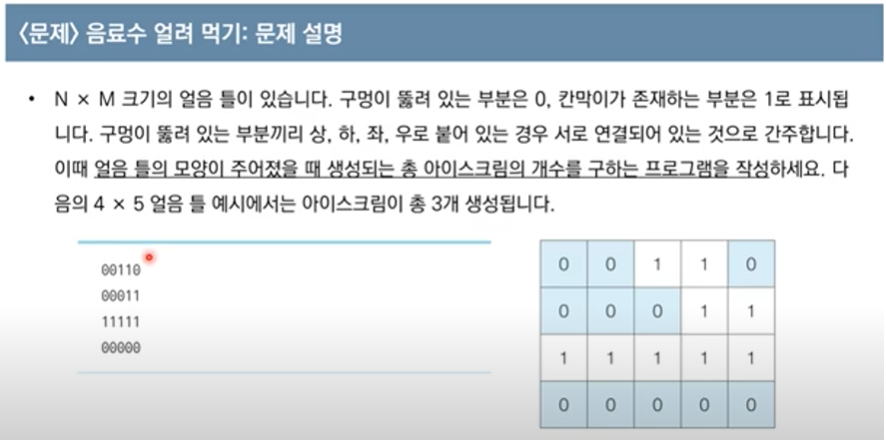

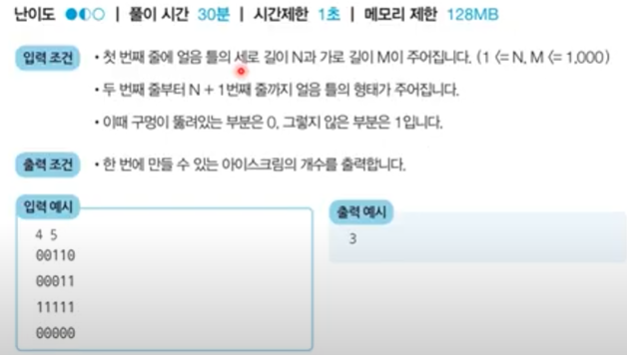

* 2차원 배열 얼음틀을 그래프로 표현할 수 있다
    * 배열 내 원소 0은 노드
    * 상호좌우로 원소 0이 연결된 경우, 인접한 노드

* 배열의 모든 원소를 순회하며, 값이 0이면서 방문하지 않은 경우 DFS / BFS를 수행한다.
    * 주변 상하좌우를 살펴본 뒤, 값이 0이면서 방문하지 않은 지점이 있으면 해당 지점을 방문한다.
    * 방문한 지점에서 위 과정을 반복 시, 연결된 모든 지점을 방문할 수 있다.
    * 한 아이스크림의 모든 0을 방문할 시 DFS/BFS가 종료된다
    
* DFS/BFS의 총 수행 횟수가 아이스크림의 수이다.
    * 난 재귀함수가 안 익숙해서 BFS로 많이 한다. 저자님은 DFS로 푸셨다.

In [ ]:
# BFS 이용 풀이

from collections import deque

N, M = map(int, input().split())
grid = []

# 2차원 배열은 리스트 컴프리헨션으로...
visited = [[False] * M for _ in range(N)]

for _ in range(N):
    grid.append(list(map(int, input())))

# 별도의 2차원 배열 없이, 직접 상하좌우 둘러보는 방식으로 구현
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

def bfs(x, y):
    queue = deque([(x, y)])
    visited[x][y] = True

    while queue:
        x, y = queue.popleft()
        for i in range(4):
            new_x, new_y = x + dx[i], y + dy[i]

            # 범위를 벗어나지 않는가?
            if 0 <= new_x < N and 0 <= new_y < M:
                # 구멍이 뚫려 있고, 방문한 적이 없는가?
                if grid[new_x][new_y] == 0 and visited[new_x][new_y] == False:
                    queue.append((new_x, new_y))
                    visited[new_x][new_y] = True

answer = 0

for x in range(N):
    for y in range(M):
        # 구멍이 뚫려있으며 방문하지 않은 칸에서 BFS 수행
        # BFS가 이루어진 횟수가 총 아이스크림의 수
        if grid[x][y] == 0 and visited[x][y] == False:
            bfs(x, y)
            answer += 1

print(answer)

4 5
00110
00011
11111
00000
3


In [ ]:
# DFS 이용 풀이

N, M = map(int, input().split())
grid = []

for _ in range(N):
    grid.append(list(map(int, input())))

# 별도의 2차원 그래프 없이, 직접 오른쪽, 아래쪽을 둘러보는 방식으로 구현
dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

def dfs(x, y):
    # 범위를 벗어나지 않는가?
    if 0 <= x < N and 0 <= y < M:
        # 구멍이 뚫려 있고, 방문한 적이 없는가?
        if grid[x][y] == 0:
            # 방문 처리
            grid[x][y] = 1
            for i in range(4):
                dfs(x + dx[i], y + dy[i])

    # 종료 조건: 위 if문 2개 중 하나라도 만족하지 않은 경우

answer = 0

for x in range(N):
    for y in range(M):
        # 구멍이 뚫려있으며 방문하지 않은 칸에서 BFS 수행
        # DFS가 이루어진 횟수가 총 아이스크림의 수
        if grid[x][y] == 0:
            dfs(x, y)
            answer += 1

print(answer)

4 5
00110
00011
11111
00000
3


# [문제] 미로 탈출

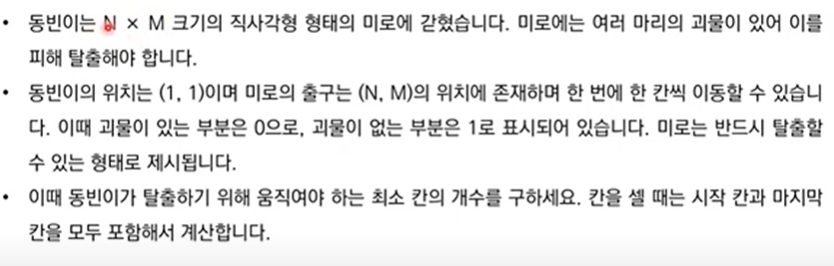

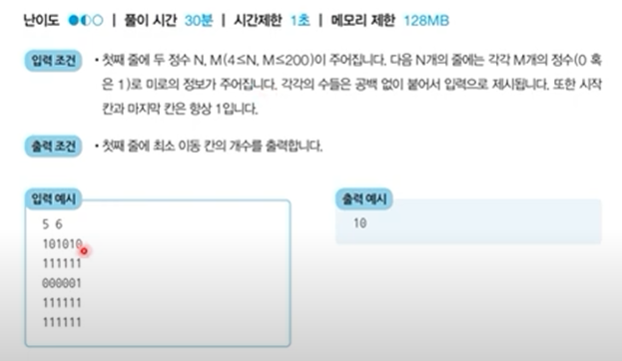

* **최소 칸의 개수** -> 최단 거리 문제!!
* 최단 거리가 짧은 순서대로 탐색을 하는 BFS를 사용할 수 있다.
* 2차원 배열을 그래프로, 상하좌우로 인접한 1을 인접한 노드로 간주한다.
* 매번 각 노드에 대한 최단 거리를 계산해야 한다. (별도의 배열을 만들든, 원래 배열의 값을 바꾸든...)


In [ ]:
from collections import deque

N, M = map(int, input().split())
grid = []
distance = [[-1] * M for _ in range(N)]
# 거리 계산 + 방문 처리 역할. 미방문은 -1

for _ in range(N):
    grid.append(list(map(int, input())))

# 시작점 (0, 0)에 대해
queue = deque([(0, 0)]) # 시작점을 큐에 입력
distance[0][0] = 1 # 방문 처리 / 거리는 자기 자신이므로 1

dx = [-1, 0, 1, 0]
dy = [0, -1, 0, 1]

# BFS 수행
while queue:
    x, y = queue.popleft()

    for i in range(4):
        nx, ny = x + dx[i], y + dy[i]

        # 범위를 벗어나지 않았는지 체크
        if 0 <= nx < N and 0 <= ny < M:
            # 아직 방문하지 않았는지, 몬스터가 없는지 체크
            if distance[nx][ny] == -1 and grid[nx][ny] == 1:
                queue.append((nx, ny))
                # 현재 distance에서 1 추가
                distance[nx][ny] = distance[x][y] + 1

print(distance[N - 1][M - 1])

5 6
101010
111111
000001
111111
111111
10


In [ ]:
from pprint import pprint

pprint(distance)

[[1, -1, 5, -1, 7, -1],
 [2, 3, 4, 5, 6, 7],
 [-1, -1, -1, -1, -1, 8],
 [14, 13, 12, 11, 10, 9],
 [15, 14, 13, 12, 11, 10]]


# 같이 풀어볼 문제


특정 거리의 도시 찾기 (실버 II)
* https://www.acmicpc.net/problem/18352

단지번호붙이기 (실버 I)
* https://www.acmicpc.net/problem/2667
